**Goal:** In this notebook, we will review various examples of plotting and data visualizations.

**Main Libraries:** 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

In [1]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats
from numpy import median


In [2]:
sns.set(color_codes=True)
#Visualizing CSV Data
df = pd.read_csv(r'C:\Users\M\Downloads\NYC_Parks_Structures.csv')
sns.color_palette("tab10")
rows, columns = df.shape
print('rows: {:,},\ncolumns: {}'.format(rows, columns))
df['CNSTRCT_YR'] = df['CNSTRCT_YR'].replace({0:np.nan})
# printing the column names, non-null counts, and data types of our columns
df.info()

rows: 2,776,
columns: 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Alteration_Year    42 non-null     float64
 1   BBL                2675 non-null   float64
 2   BIN                2447 non-null   float64
 3   borough            2764 non-null   object 
 4   Comfort Station    2764 non-null   object 
 5   CNSTRCT_YR         1805 non-null   float64
 6   DESCRIPTION        2579 non-null   object 
 7   DOITT_ID           2281 non-null   float64
 8   DOITT_Source       2240 non-null   object 
 9   Demolition_Year    0 non-null      float64
 10  GISPROPNUM         2760 non-null   object 
 11  GROUNDELEV         2234 non-null   float64
 12  HEIGHTROOF         2164 non-null   float64
 13  LOCATION           1647 non-null   object 
 14  MaintBy            0 non-null      float64
 15  MaintBySpec        0 non-null      float64
 16 

Distribution Plots with Seaborn (Histograms)

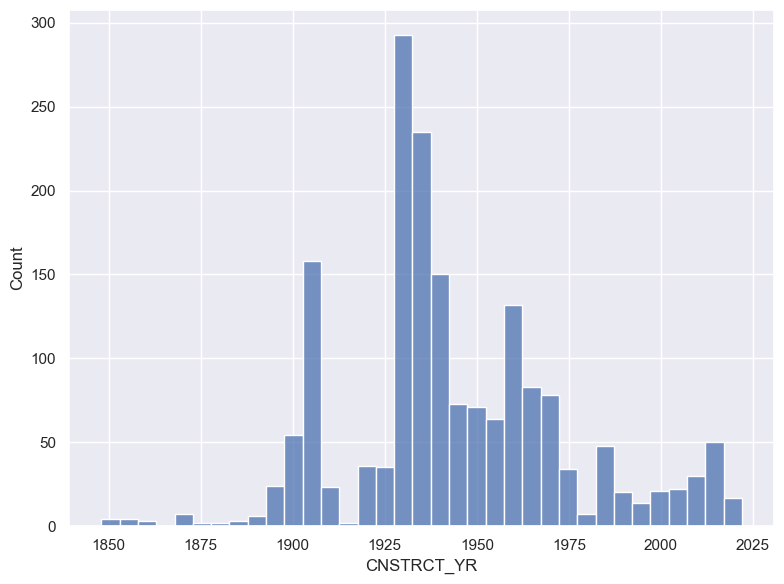

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df['CNSTRCT_YR'],
             ax=ax)
plt.tight_layout()

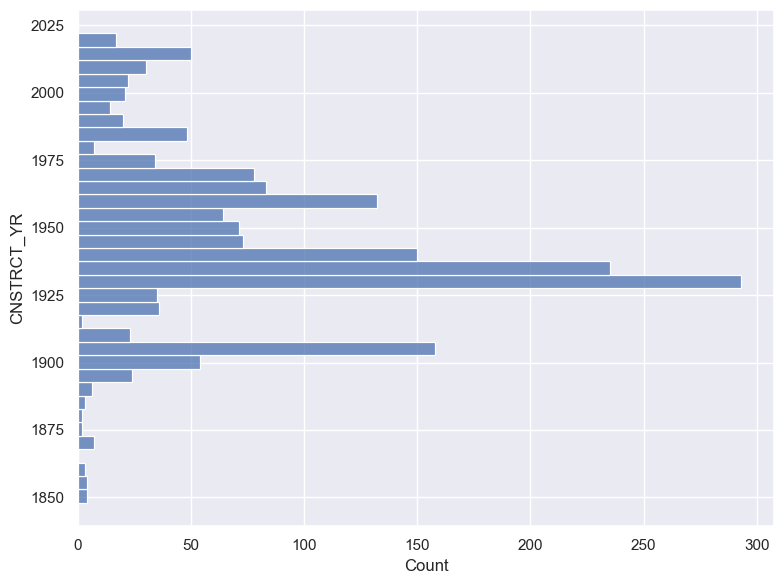

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(y=df['CNSTRCT_YR'], 
             ax=ax)
plt.tight_layout()

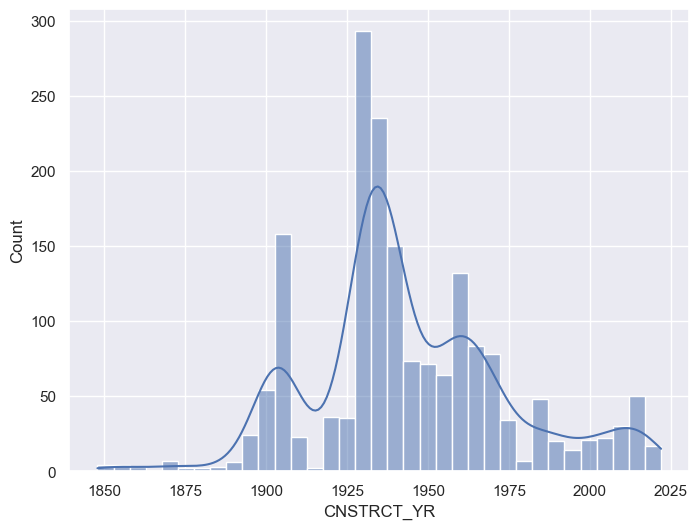

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df['CNSTRCT_YR'],
             kde=True,
             ax=ax)
plt.show()


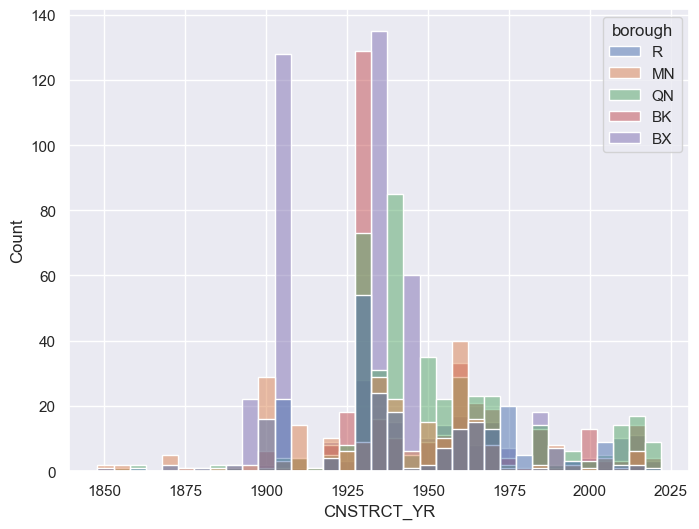

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df, 
             x='CNSTRCT_YR',
             hue='borough',
             ax=ax)
plt.show()


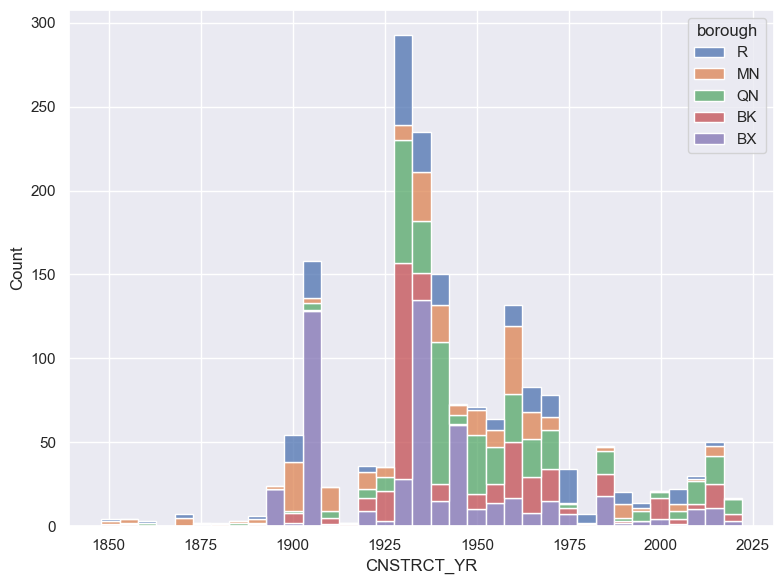

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df, 
             x='CNSTRCT_YR',
             hue='borough',
             multiple="stack",
             ax=ax)
plt.tight_layout()

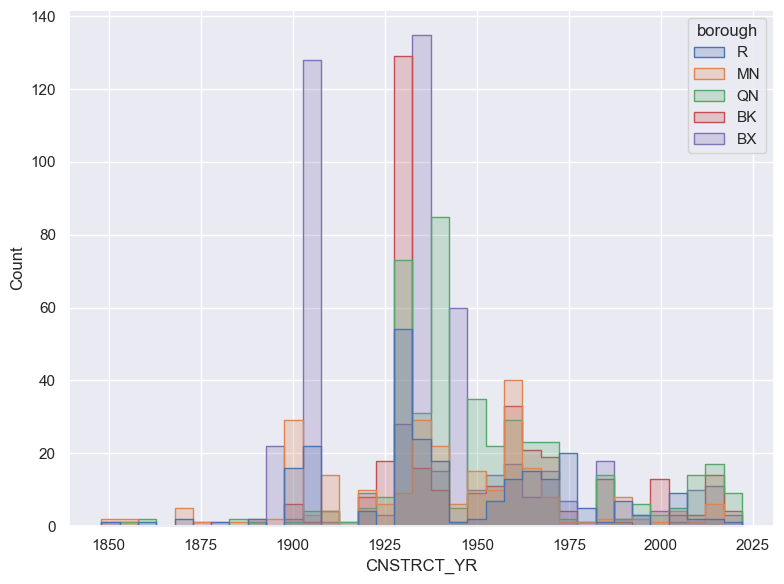

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df, 
             x='CNSTRCT_YR',
             hue='borough',
             element="step",
             ax=ax)
plt.tight_layout()

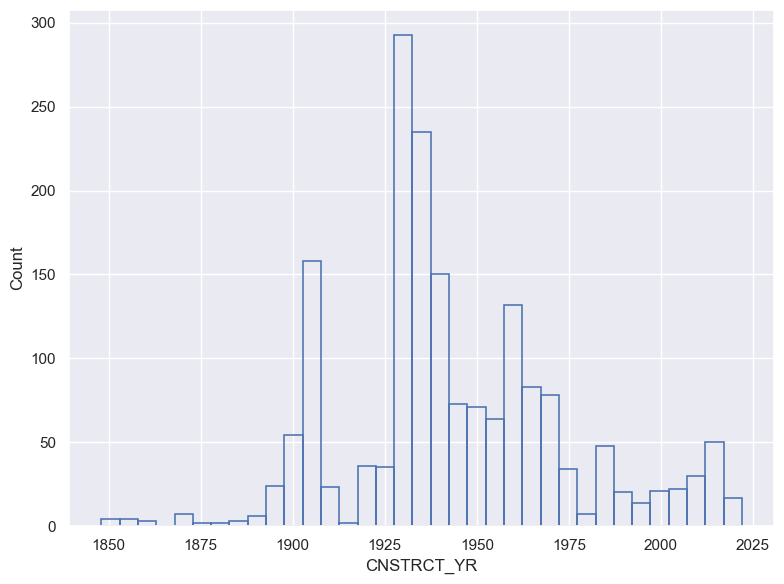

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df, 
             x='CNSTRCT_YR',
             fill=False,
             ax=ax)
plt.tight_layout()

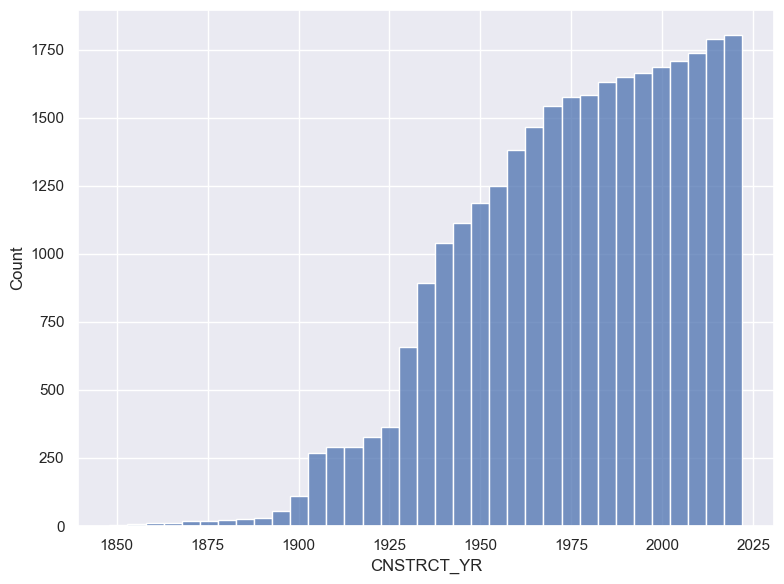

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df['CNSTRCT_YR'],
             cumulative=True,
             ax=ax)
plt.tight_layout()

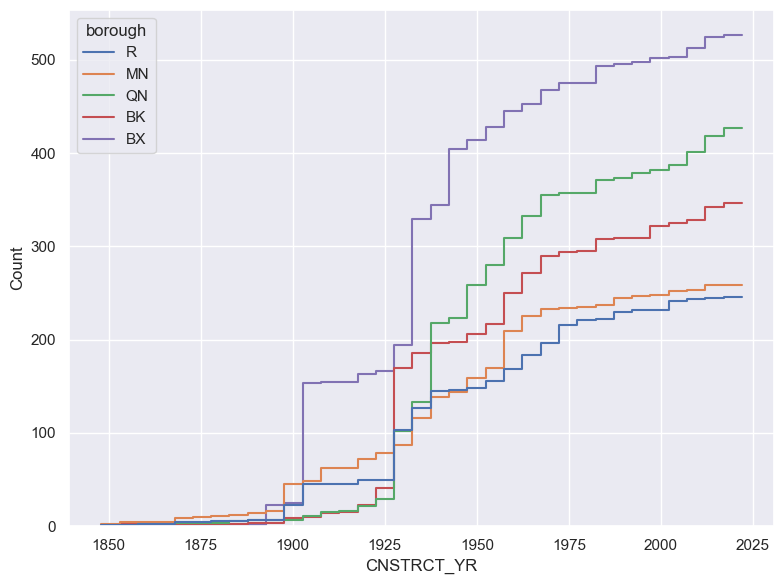

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df,
             x='CNSTRCT_YR',
             hue='borough',
             cumulative=True,
             element="step",
             fill=False,
             ax=ax)
plt.tight_layout()

Kernel Density Estimation Plots

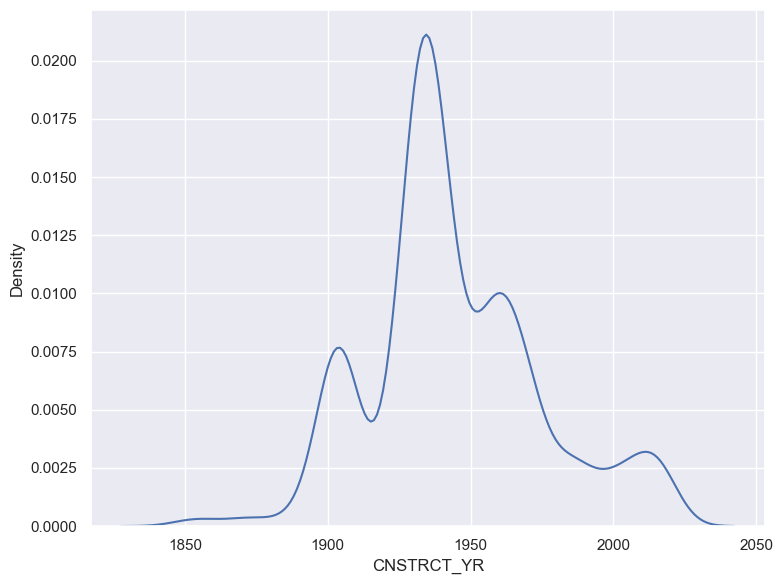

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(df['CNSTRCT_YR'],
            ax=ax)
plt.tight_layout()


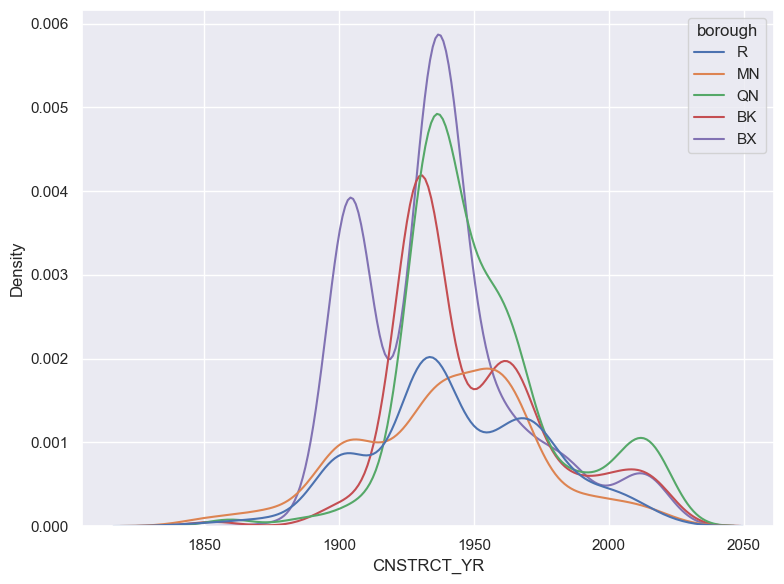

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=df, 
            x='CNSTRCT_YR',
            hue='borough', 
            ax=ax)
plt.tight_layout()

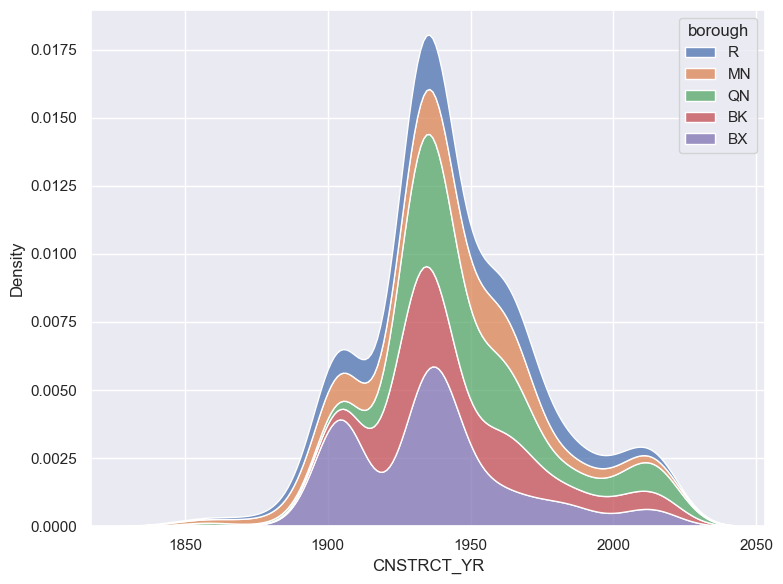

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=df, 
            x='CNSTRCT_YR',
            hue='borough', 
            multiple='stack', 
            ax=ax)
plt.tight_layout()

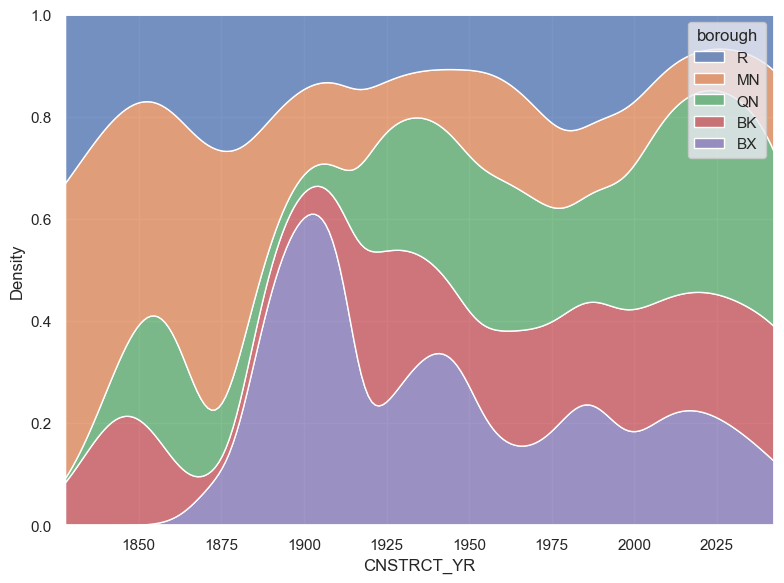

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=df, 
            x='CNSTRCT_YR',
            hue='borough', 
            multiple='fill', 
            ax=ax)
plt.tight_layout()

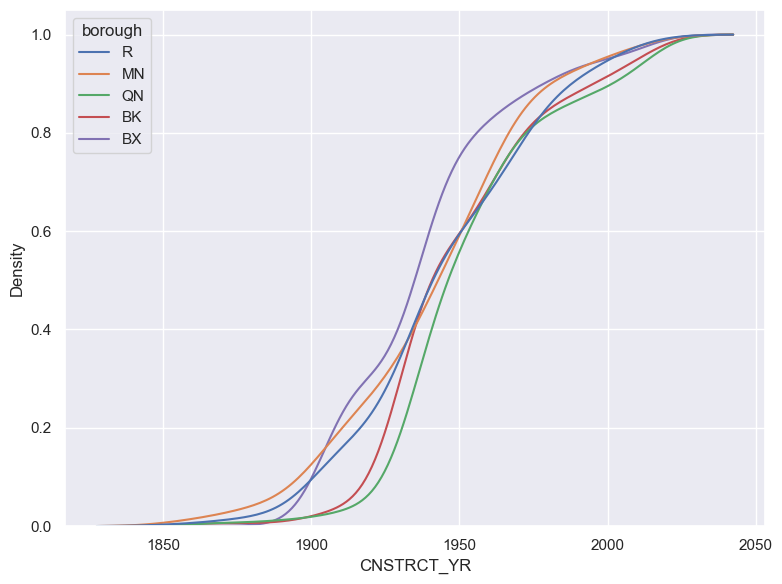

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=df, 
            x='CNSTRCT_YR',
            hue='borough', 
            cumulative=True, 
            common_norm=False, 
            common_grid=True, 
            ax=ax)
plt.tight_layout()

Empirical Cummulative Distribution Functions


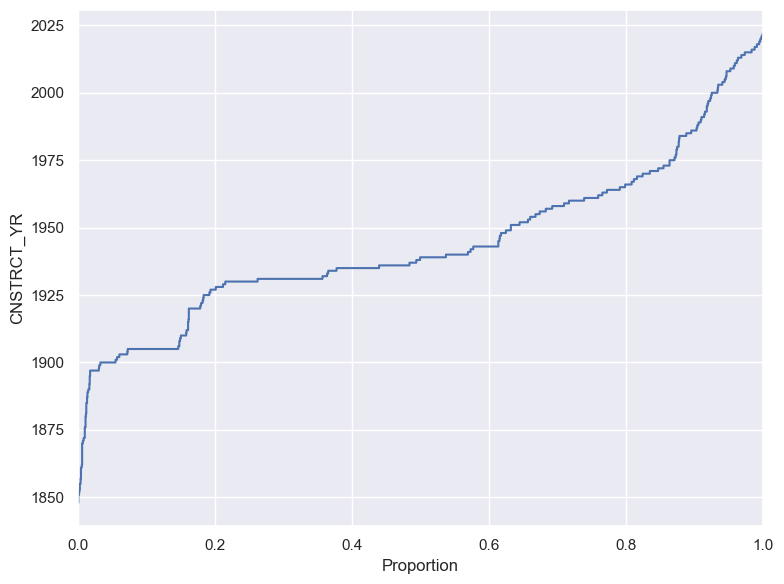

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sns.ecdfplot(data=df, 
             y="CNSTRCT_YR", 
             ax=ax)
plt.tight_layout()

Dist. Plots on a faced grid

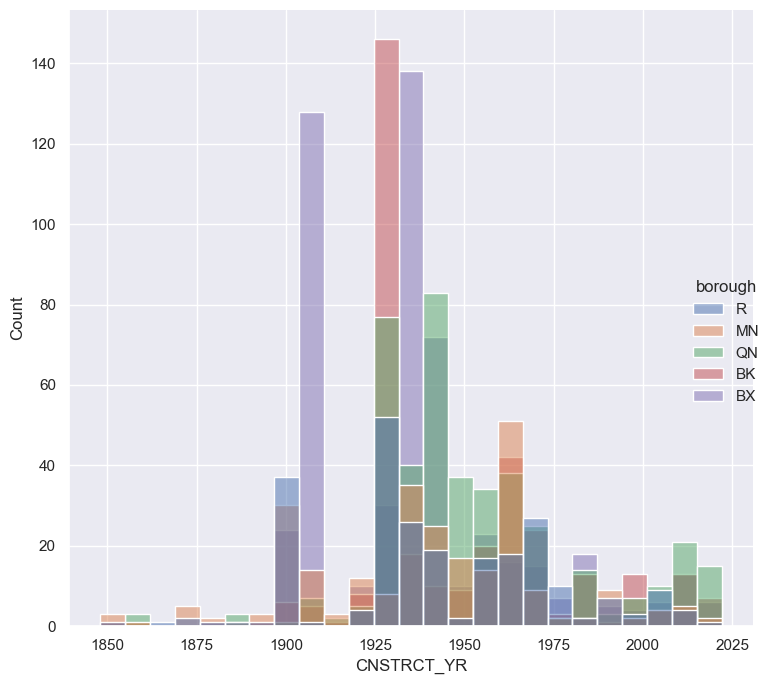

In [19]:
sns.displot(data=df, 
            x="CNSTRCT_YR", 
            bins=25,
            hue="borough", 
            kind="hist",
            height=7,
            facet_kws={"legend_out": True})
plt.tight_layout()

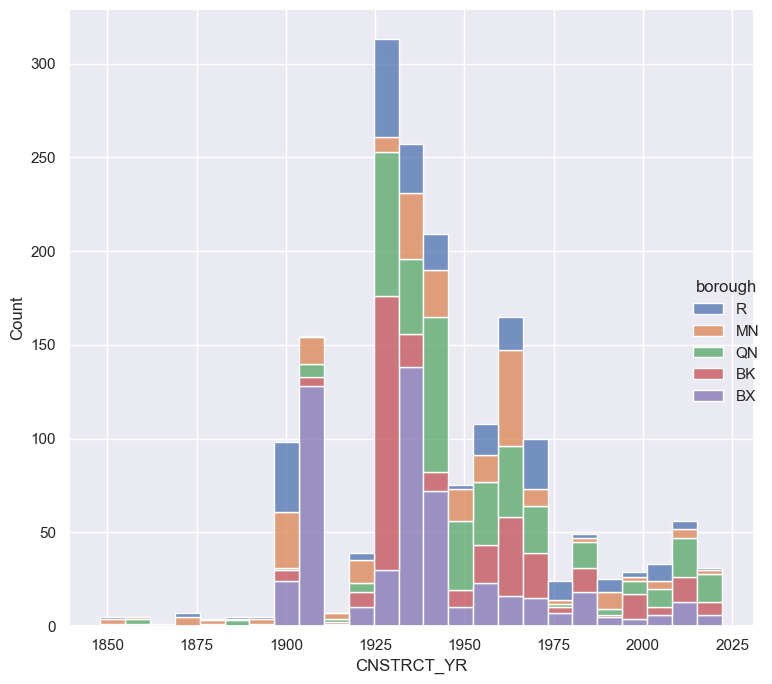

In [20]:
sns.displot(data=df, 
            x="CNSTRCT_YR", 
            bins=25,
            hue="borough", 
            multiple="stack",
            height=7,
            facet_kws={"legend_out": True})
plt.tight_layout()

line Plots

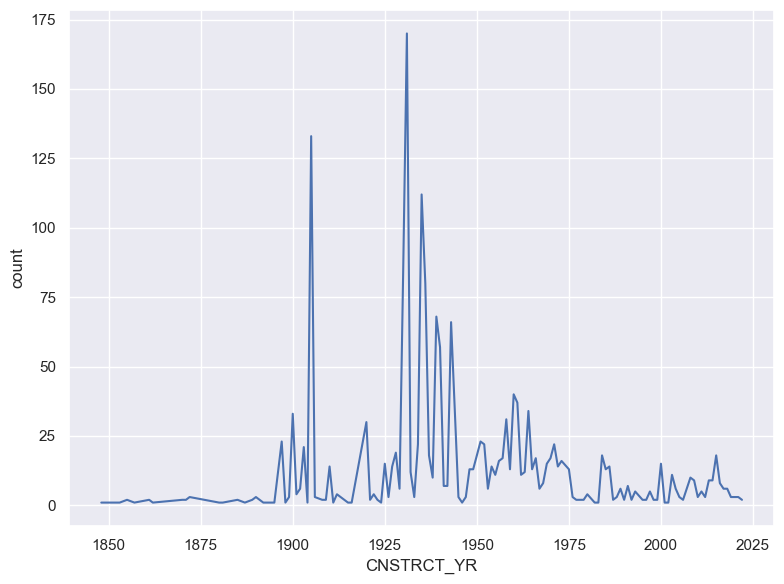

In [22]:
by_year = df.groupby('CNSTRCT_YR')[['DOITT_ID']].count()
by_year = by_year.rename(columns={'DOITT_ID': 'count'})
by_year = by_year.reset_index()
by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=by_year, 
             x="CNSTRCT_YR", 
             y="count", 
             ax=ax)
plt.tight_layout()

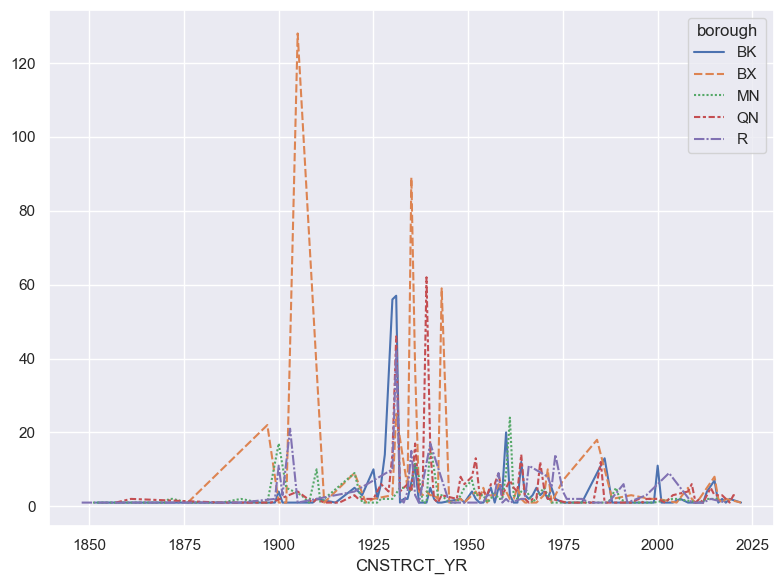

In [23]:
by_year.head()
line_pivot = pd.pivot_table(df, 
                            values='DOITT_ID', 
                            index=['CNSTRCT_YR'], 
                            columns=['borough'], 
                            aggfunc='count')

fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=line_pivot, 
             ax=ax)
plt.tight_layout()

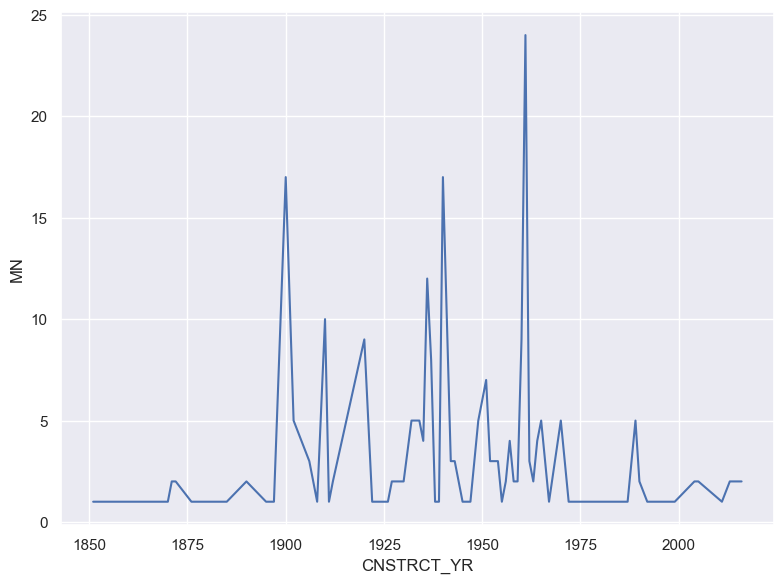

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=line_pivot['MN'], 
             ax=ax)
plt.tight_layout()

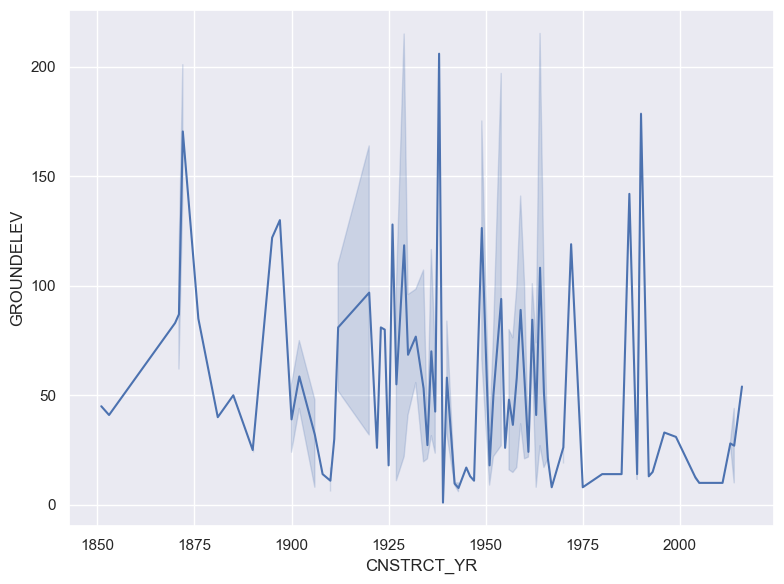

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
manhattan_df = df.loc[df['borough'] == 'MN']
sns.lineplot(data=manhattan_df, 
             x="CNSTRCT_YR", 
             y="GROUNDELEV", 
             ax=ax)
plt.tight_layout()

Scatter Plots

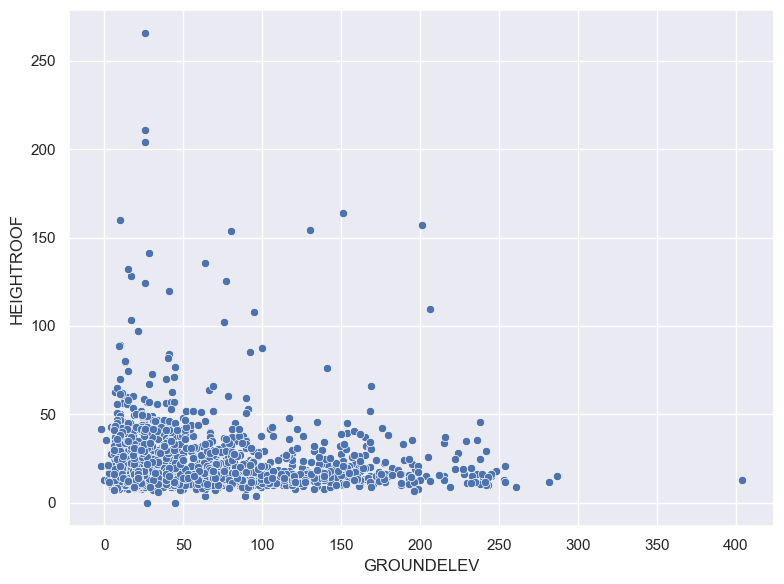

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=df['GROUNDELEV'],
                y=df['HEIGHTROOF'], 
                ax=ax)
plt.tight_layout()

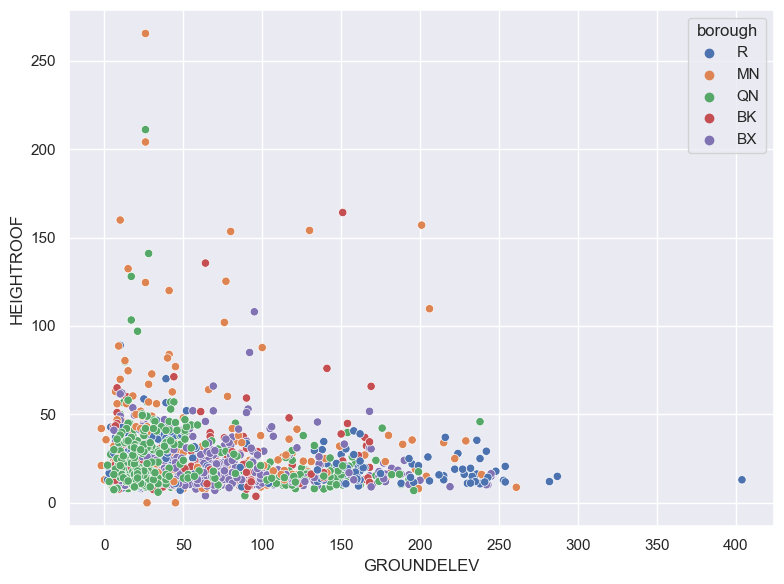

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=df['GROUNDELEV'],
                y=df['HEIGHTROOF'], 
                data=df, 
                hue="borough", 
                ax=ax)
plt.tight_layout()

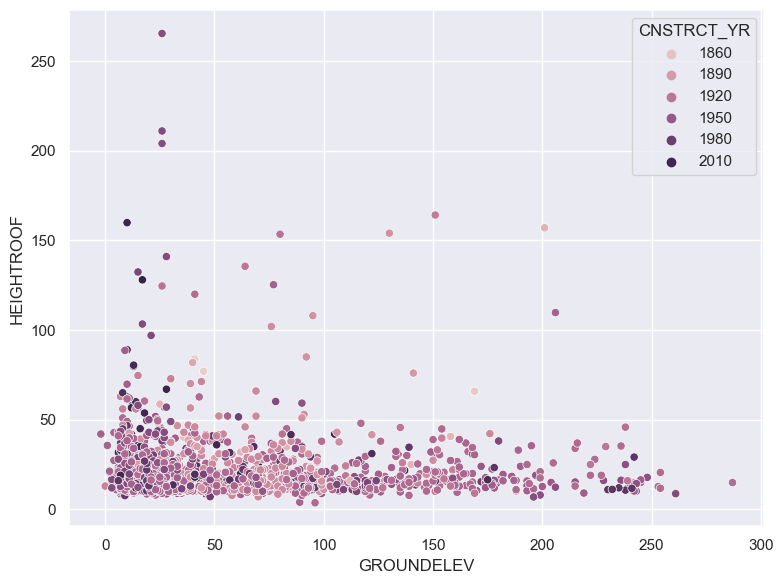

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=df['GROUNDELEV'],
                y=df['HEIGHTROOF'], 
                data=df, 
                hue="CNSTRCT_YR", 
                ax=ax)
plt.tight_layout()

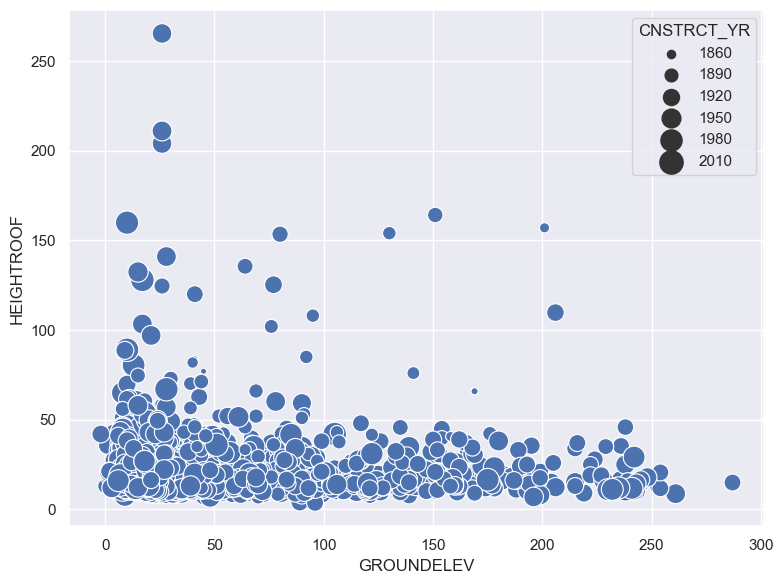

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['GROUNDELEV'],
                y=df['HEIGHTROOF'], 
                data=df, 
                size="CNSTRCT_YR", 
                sizes=(15, 300))
plt.tight_layout()

Count Plot

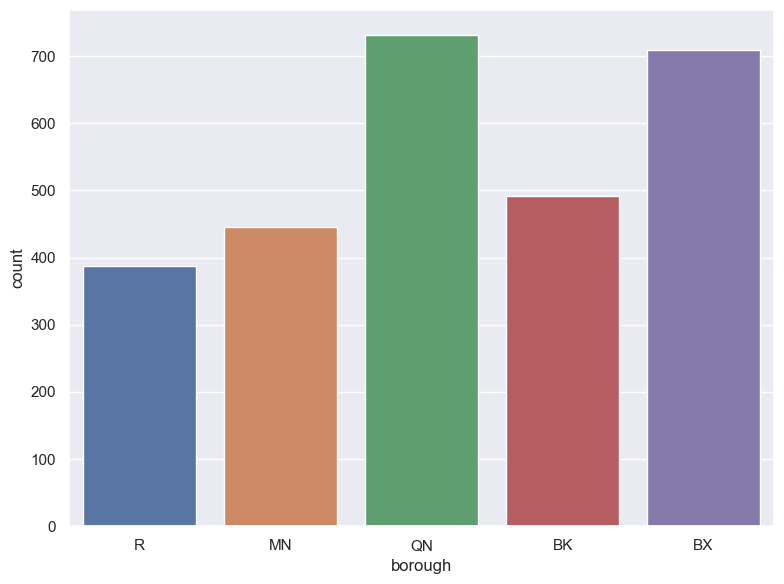

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="borough", 
              data=df, 
              ax=ax)
plt.tight_layout()

scatter plot swarm

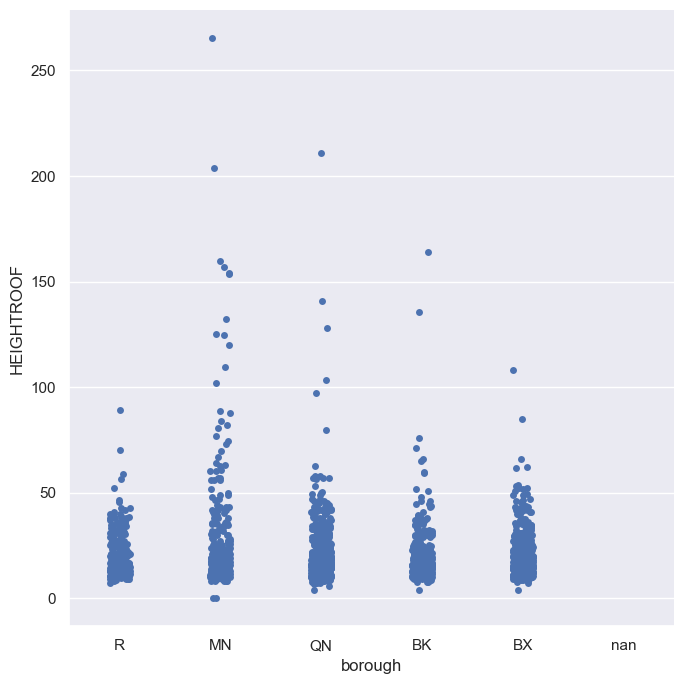

In [32]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            data=df, 
            height=7)
plt.tight_layout()

box Plot

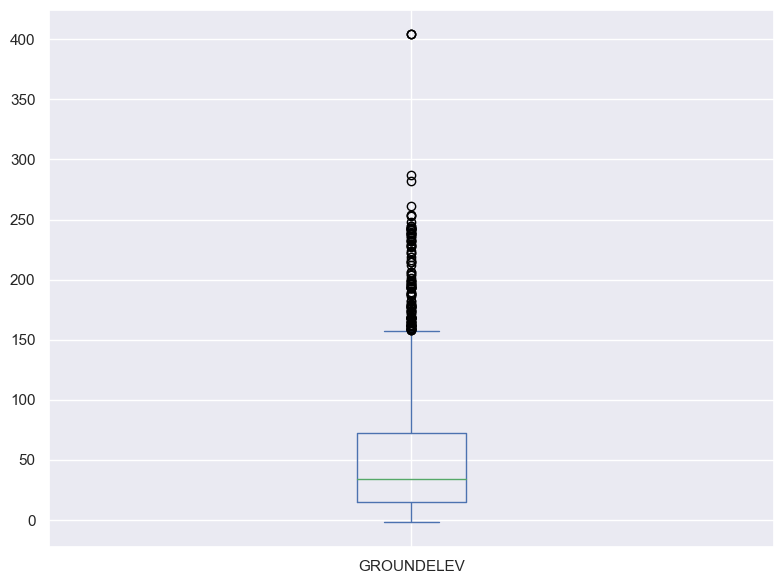

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
df['GROUNDELEV'].plot.box(ax=ax)
plt.tight_layout()

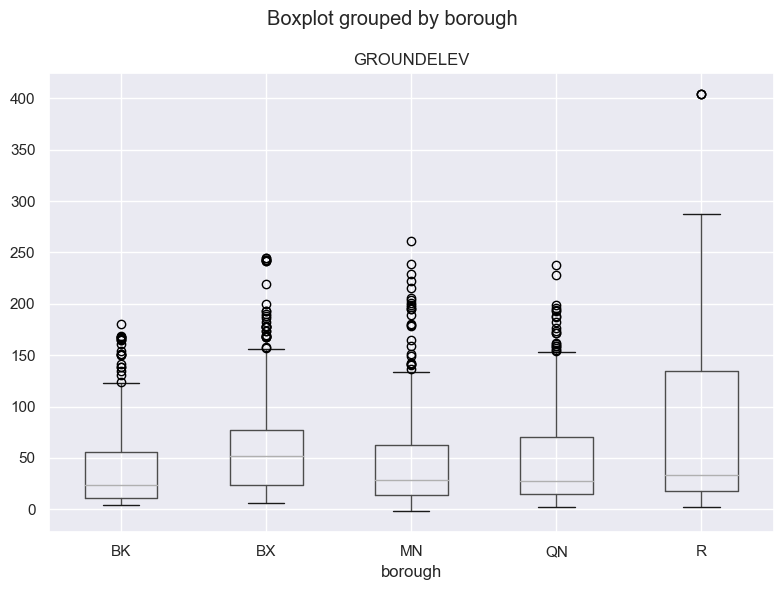

In [34]:
df_box = df[['borough', 'GROUNDELEV']]
fig, ax = plt.subplots(figsize=(8,6))
df_box.boxplot(by='borough', ax=ax)
plt.xlabel('borough')
plt.tight_layout()

AREA plot

int64


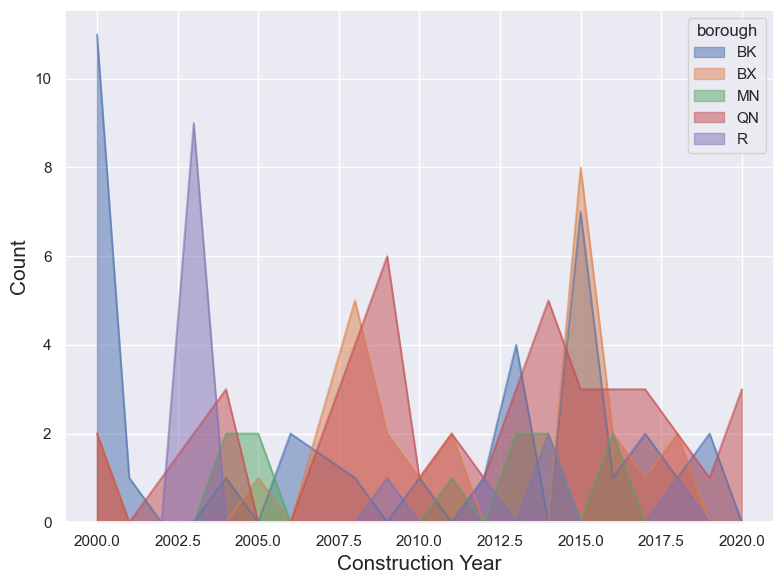

In [35]:
area = df[df['CNSTRCT_YR'].between(2000, 2020)]


area = pd.pivot_table(area, 
                       values='DOITT_ID', 
                       index=['CNSTRCT_YR'], 
                       columns=['borough'], 
                       aggfunc=pd.Series.nunique)

area = area.rename(columns={'DOITT_ID': 'count'})
area.index = area.index.astype('int64')

print(area.index.dtype)
area.head()
fig, ax = plt.subplots(figsize=(8,6))
area.plot.area(ax=ax, stacked=False)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()

<Axes: xlabel='CNSTRCT_YR'>

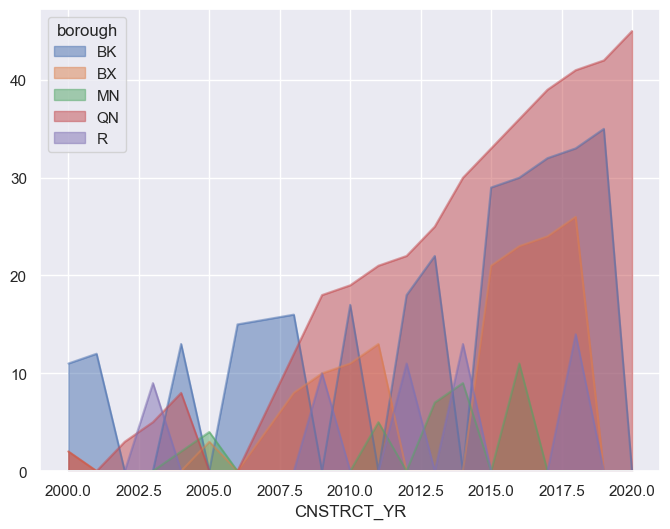

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
area_cumsum = area.cumsum()
area_cumsum.head()

area_cumsum.plot.area(ax=ax, stacked=False)

 formatting Y axis with comma

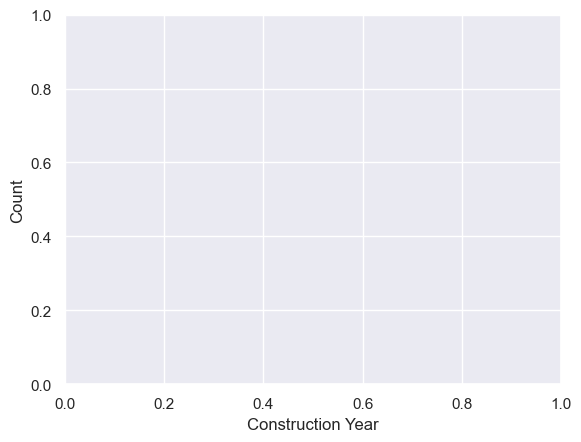

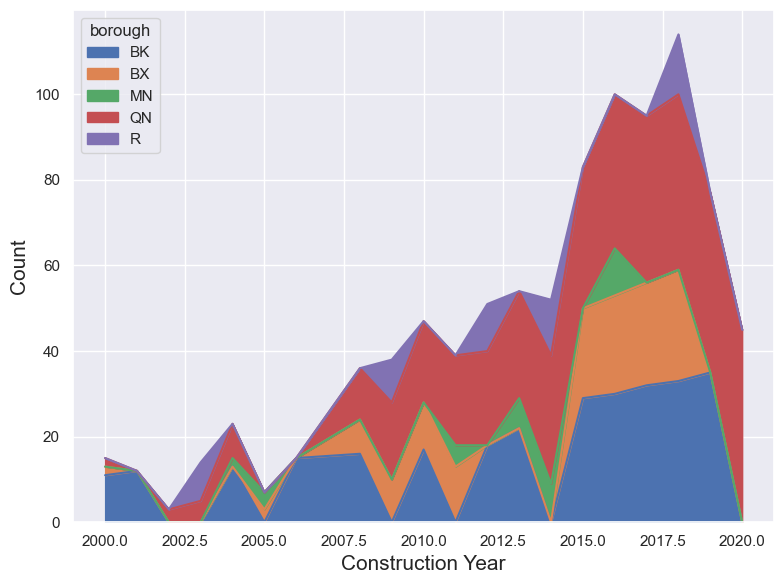

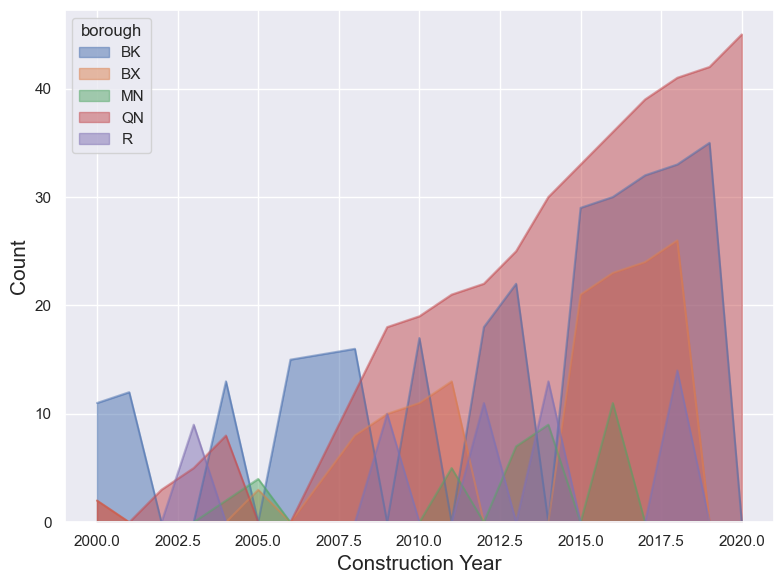

In [46]:
# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()


fig, ax = plt.subplots(figsize=(8,6))

area_cumsum.plot.area(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(8,6))

area_cumsum.plot.area(ax=ax, stacked=False)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()

pie plot

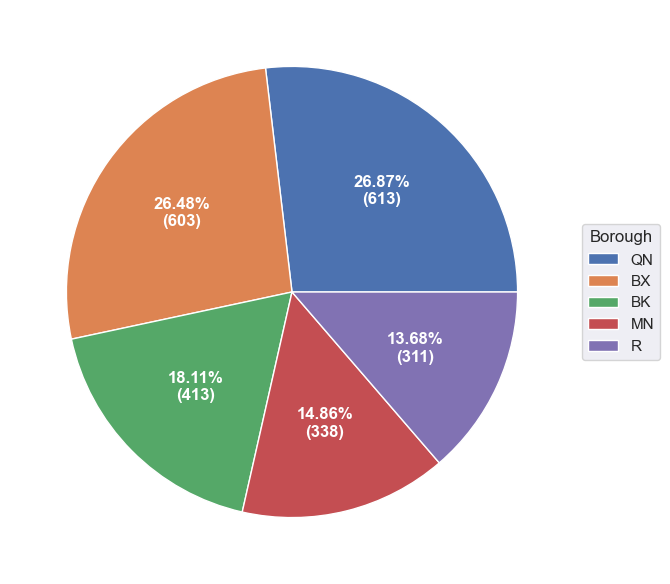

In [41]:
pie = df.groupby('borough')['DOITT_ID'].count()
pie.rename("count", inplace=True)
pie = pie.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(pie, 
                                  autopct=lambda pct: func(pct, pie),
                                  textprops=dict(color="w"))

ax.legend(wedges, 
          pie.index,
          title="Borough",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) 

plt.setp(autotexts, size=12, weight="bold")
plt.tight_layout()

boxen plot

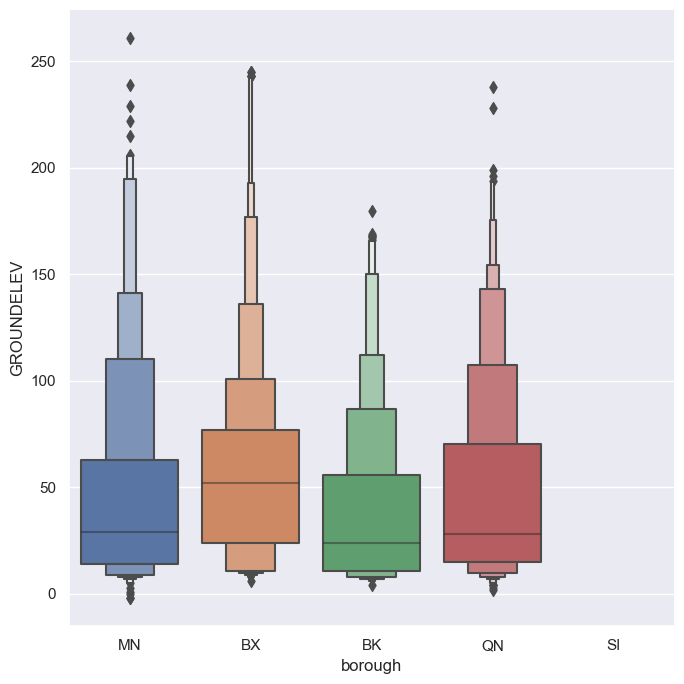

In [42]:
data = df
order = ["MN", "BX", "BK", "QN", "SI"]
sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="boxen", 
            data=data, 
            order=order, 
            height=7)
plt.tight_layout()

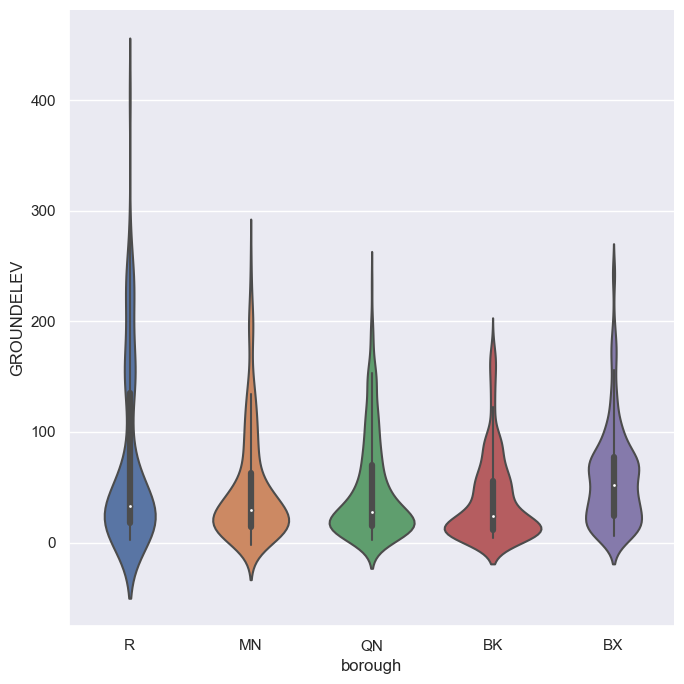

In [43]:
data = df
sns.catplot(x="borough", 
            y="GROUNDELEV",  
            kind="violin", 
            split=True, 
            data=data, 
            height=7)
plt.tight_layout()

<Axes: xlabel='CNSTRCT_YR'>

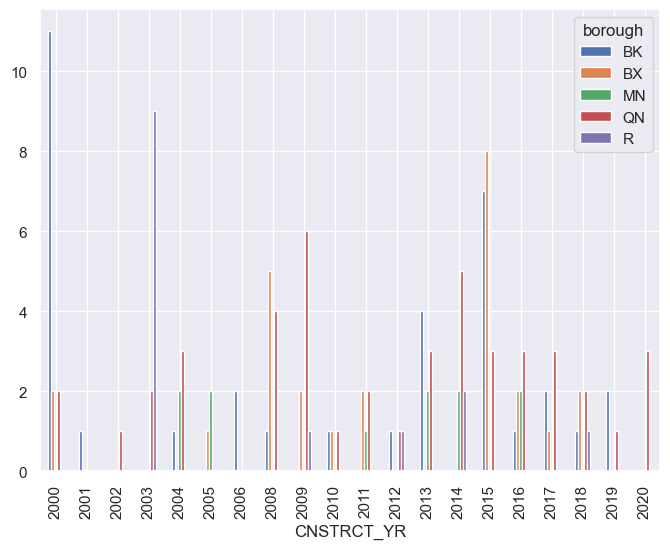

In [44]:
#part 2 area Plot
fig, ax = plt.subplots(figsize=(8,6))
area.plot(kind='bar', 
           ax=ax)

datetime64[ns]


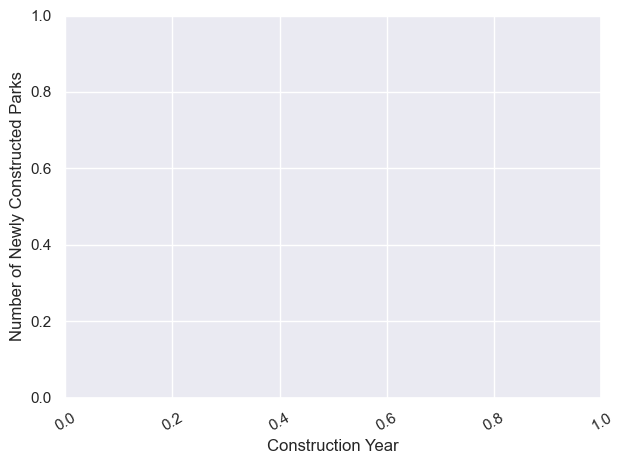

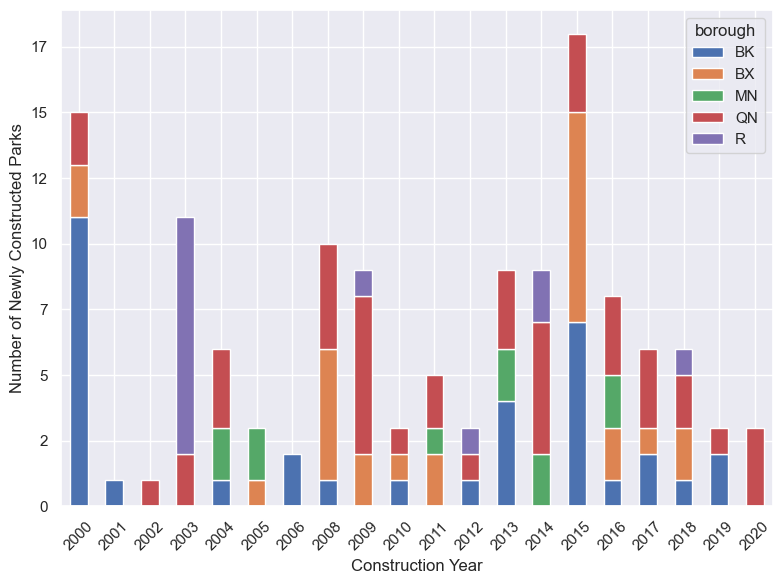

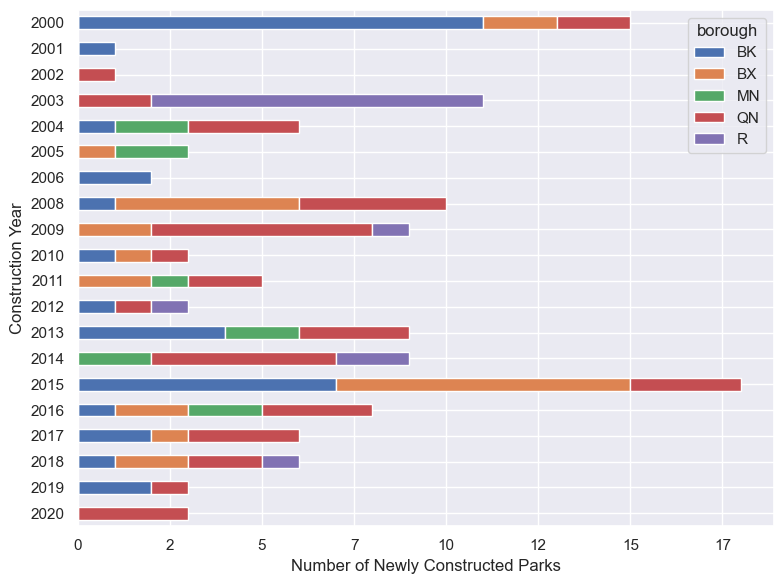

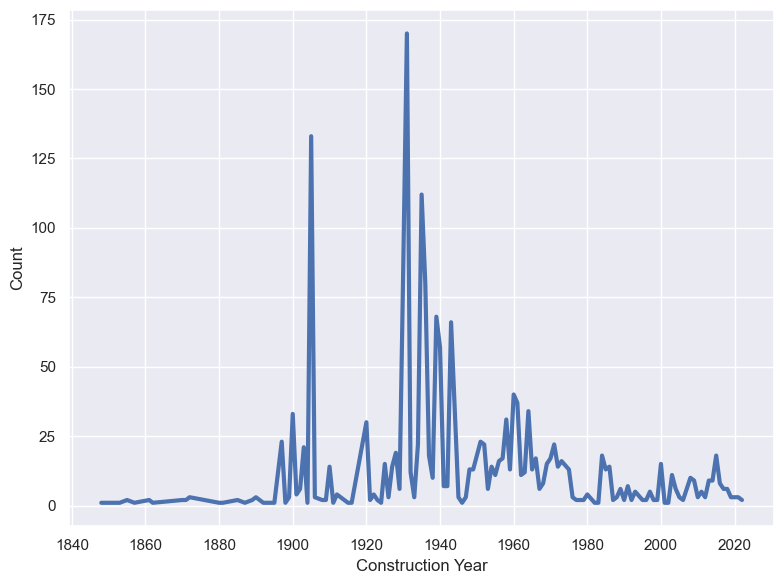

In [45]:
# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=30)
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Newly Constructed Parks', fontsize=12)
plt.tight_layout()


fig, ax = plt.subplots(figsize=(8,6))
area.plot.bar(stacked=True, 
               ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Newly Constructed Parks', fontsize=12)
plt.tight_layout()


fig, ax = plt.subplots(figsize=(8,6))
area.sort_index(ascending=False).plot.barh(stacked=True, 
                                            ax=ax)

# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Number of Newly Constructed Parks', fontsize=12)
plt.ylabel('Construction Year', fontsize=12)
plt.tight_layout()


g = df.groupby('CNSTRCT_YR')['DOITT_ID'].count().reset_index()
g = g.rename(columns={'DOITT_ID': 'count'})
g.set_index('CNSTRCT_YR', drop=False, inplace=True)
g.index = g.index.astype('int64')

# transforming our 'Year' index to datetime
g.index = pd.to_datetime(g.index, format='%Y')
print(g.index.dtype)
g.head()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(g['count'], 
        linewidth=3)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()